In [ ]:
#install mediapipe & numpy
!pip install numpy==1.19.3
!pip install mediapipe


In [ ]:
# download & decompres the data the same way you would in mma
!rm kinetics400_tiny.zip*
!rm -rf kinetics400_tiny
!wget https://download.openmmlab.com/mmaction/kinetics400_tiny.zip
!unzip kinetics400_tiny.zip > /dev/null

rm: cannot remove 'kinetics400_tiny.zip*': No such file or directory
--2021-02-26 17:49:59--  https://download.openmmlab.com/mmaction/kinetics400_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18308682 (17M) [application/zip]
Saving to: ‘kinetics400_tiny.zip’

kinetics400_tiny.zi 100%[===================>]  17.46M  8.19MB/s    in 2.1s    

2021-02-26 17:50:02 (8.19 MB/s) - ‘kinetics400_tiny.zip’ saved [18308682/18308682]



In [ ]:
# Check the directory structure of the data to confirm you have the right data set

# Install the tree
!apt-get -q install tree
!tree kinetics400_tiny

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (146 kB/s)
Selecting previously unselected package tree.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
kinetics400_tiny
├── kinetics_tiny_train_video.txt
├── kinetics_tiny_val_video.txt
├── train
│   ├── 27_CSXByd3s.mp4
│   ├── 34XczvTaRiI.mp4
│   ├── A-wiliK50Zw.mp4
│   ├── D32_1gwq35E.mp4
│   ├── D92m0HsHjcQ.mp4
│   ├── DbX8mPslRXg.mp4
│   ├── FMlSTTpN3VY.mp4
│   ├── h10B9SVE-nk.mp4
│   ├── h

In [ ]:
#import mediapipe
import mediapipe as mp 

#load mediapipe solutions  
k400 = mp.solutions

completed


This is where we began to run into issues. We started by looking at all the python code on google mediapipe. All of it was extremely similar however, in every loop, the code called for a continue and simply skipped the part of processing a video. Instead it just took a picture from the video. This is shown with the first python example on google mediapipe. 

In [ ]:

# For static images:
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(file_list):
    image = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

# This code is direclty from google mediapipe
# This code shows precisely how to process an image however does not provide any insight on how to process a video

In [ ]:

cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5) as face_detection:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

# This code shows how google mediapipe handles videos in python 
# Still somewhat unsure what exactly is happening here, but we were unable to replicate this when processing our videos

We went back and looked at all the google mediapipe solutions. I began to categorize all of the code into python code, C++ code, and other code. We started to see a trend that most of the code that dealt with video processing was in C++.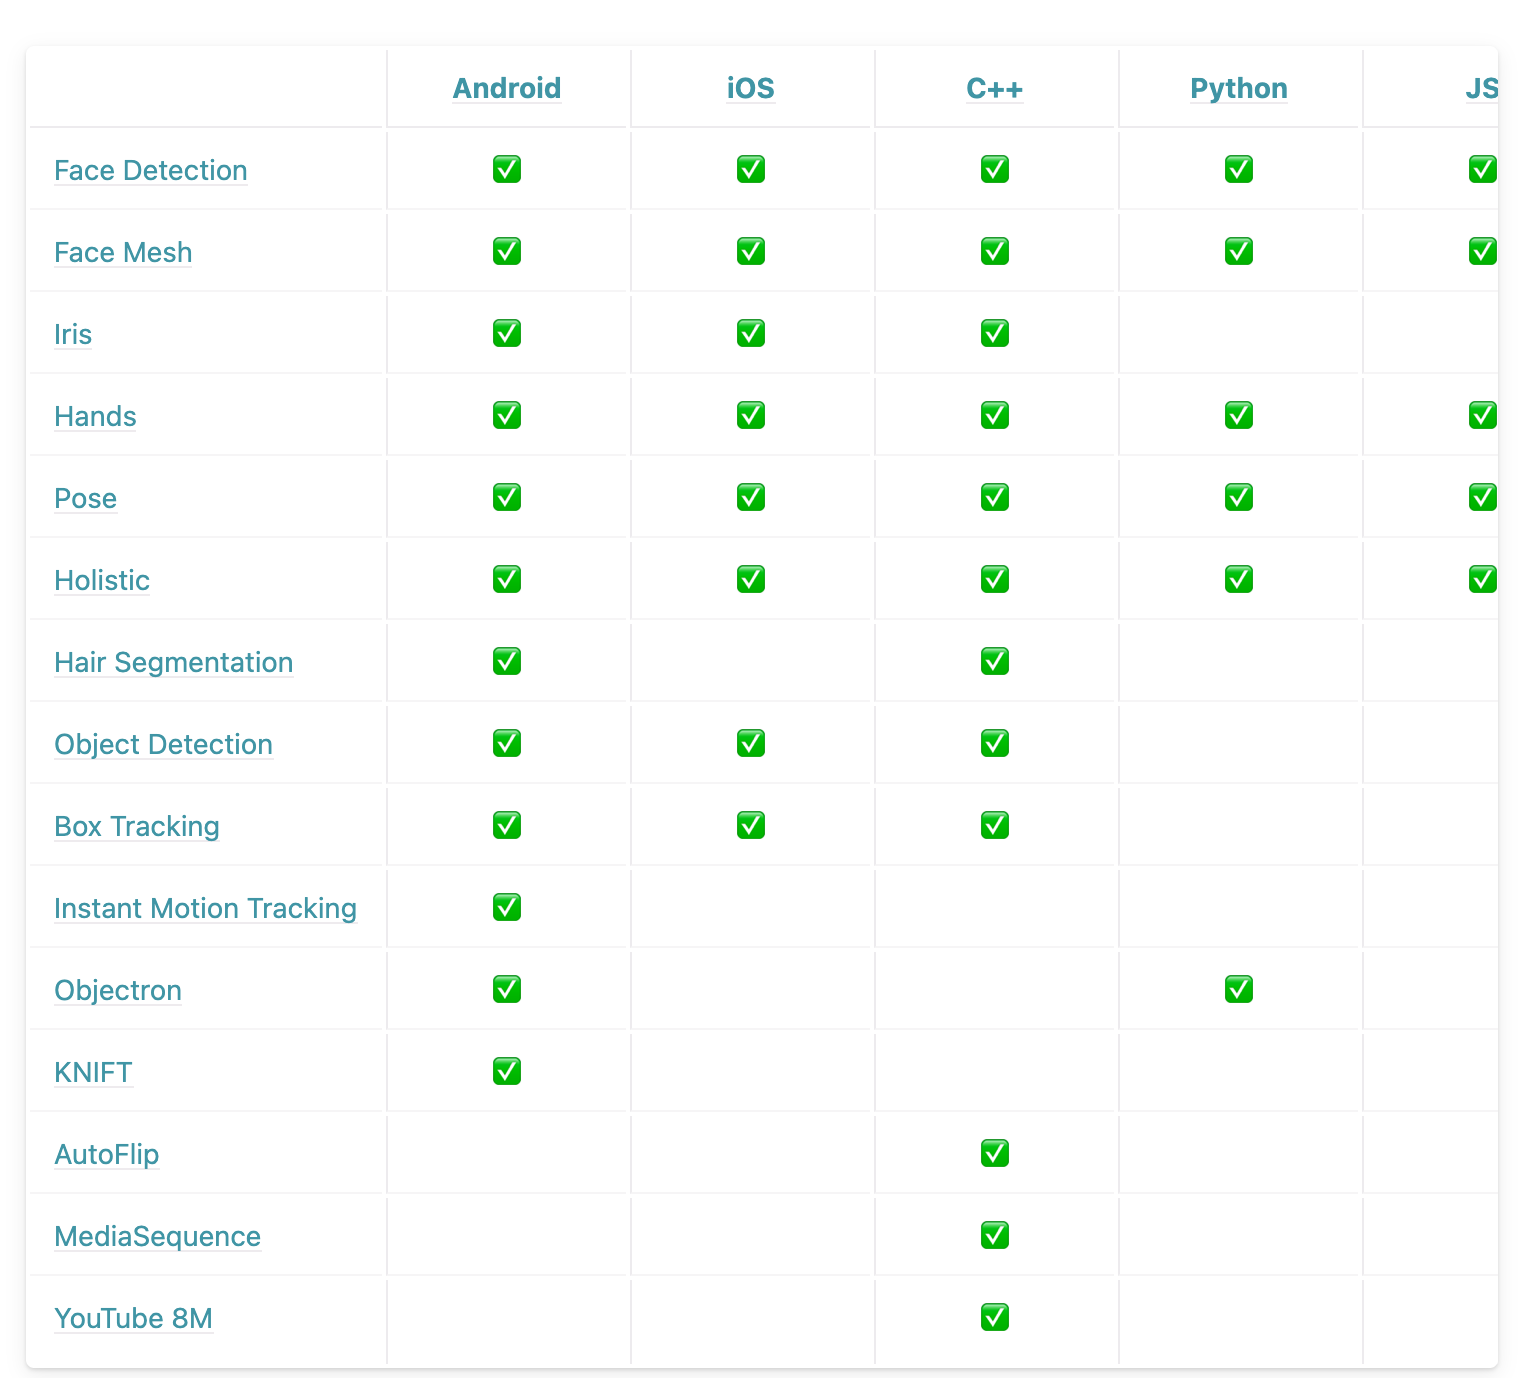

From the chart above, we were able to confirm our suspicion that we could not preprocess the videos the way we wanted to with google mediapipe in python